In [1]:
import numpy as np
import matplotlib as mpl
mpl.use("Agg")
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
BENCHMARKS_DIR = 'bifrost/test/benchmarks/'
SERIAL_BENCHMARKS_DIR = BENCHMARKS_DIR + 'performance_vs_serial/'

In [3]:
ben_benchmarks = np.genfromtxt(
    SERIAL_BENCHMARKS_DIR + 'benchmarks_ben.log.txt',
    dtype=np.float32,
    delimiter=',');
additional_ben_benchmarks =  np.genfromtxt(
    SERIAL_BENCHMARKS_DIR + 'benchmarks_ben2.log.txt',
    dtype=np.float32,
    delimiter=',');
ben_benchmarks = np.concatenate((ben_benchmarks, additional_ben_benchmarks))

In [4]:
# size multiplier, gulp size, speedup
one_fft_benchmarks = ben_benchmarks[ben_benchmarks[:, 0] == 1.0][:, 1:]
two_fft_benchmarks = ben_benchmarks[ben_benchmarks[:, 0] == 2.0][:, 1:]

# Sort these based on the first column:

In [5]:
one_fft_benchmarks = one_fft_benchmarks[np.argsort(one_fft_benchmarks[:, 0])];
two_fft_benchmarks = two_fft_benchmarks[np.argsort(two_fft_benchmarks[:, 0])];

# Log 2 the first two columns for easy display in imshow:

In [6]:
one_log_fft_benchmarks = np.copy(one_fft_benchmarks)
two_log_fft_benchmarks = np.copy(two_fft_benchmarks)
one_log_fft_benchmarks[:, 0] = np.log2(one_fft_benchmarks[:, 0])
one_log_fft_benchmarks[:, 1] = np.log2(one_fft_benchmarks[:, 1]/32768)
two_log_fft_benchmarks[:, 0] = np.log2(two_fft_benchmarks[:, 0])
two_log_fft_benchmarks[:, 1] = np.log2(two_fft_benchmarks[:, 1]/32768)

In [7]:
one_fft_display_plot = np.zeros((
    int(np.max(one_log_fft_benchmarks[:, 1]) + 1),
    int(np.max(one_log_fft_benchmarks[:, 0] - 1) + 1)))
#file size multiplier
horiz_indices = one_log_fft_benchmarks[:, 0].astype(np.int) - 1
#gulp size multiplier
vert_indices = one_log_fft_benchmarks[:, 1].astype(np.int)
one_fft_display_plot[vert_indices, horiz_indices] = one_log_fft_benchmarks[:, 2]

# Chop off some rows
one_fft_display_plot = np.copy(one_fft_display_plot[1:-3, :])

<IPython.core.display.Javascript object>


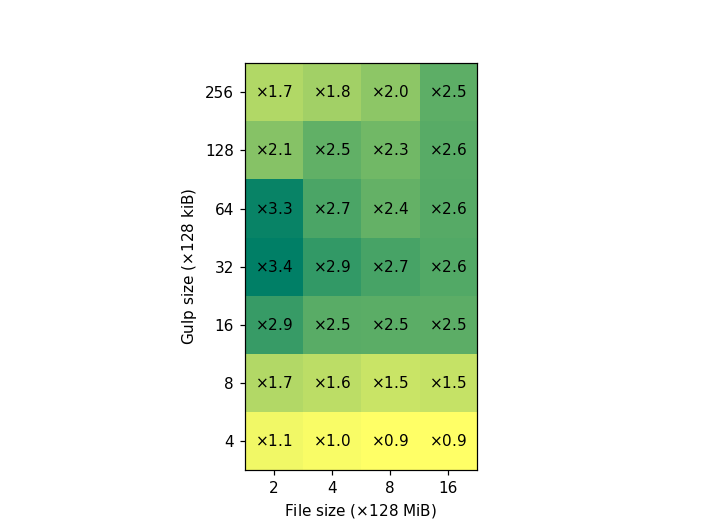

In [11]:
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.imshow(one_fft_display_plot, cmap='summer_r', origin='lower')
ax1.set_yticklabels(['', 4, 8, 16, 32, 64, 128, 256])
ax1.set_ylabel(r'Gulp size ($\times$128 kiB)')
ax1.set_xticklabels(['', 2, 4, 8, 16])
ax1.set_xlabel(r'File size ($\times$128 MiB)')
for (j,i),label in np.ndenumerate(one_fft_display_plot):
    ax1.text(i, j, r'$\times$%.1f'%label, ha='center', va='center')

In [9]:
two_fft_display_plot = np.zeros((
    int(np.max(two_log_fft_benchmarks[:, 1]) + 1),
    int(np.max(two_log_fft_benchmarks[:, 0] - 1) + 1)))
#file size multiplier
horiz_indices = two_log_fft_benchmarks[:, 0].astype(np.int)-1
#gulp size multiplier
vert_indices = two_log_fft_benchmarks[:, 1].astype(np.int)
two_fft_display_plot[vert_indices, horiz_indices] = two_log_fft_benchmarks[:, 2]

#chop off some rows
two_fft_display_plot = np.copy(two_fft_display_plot[2:-3, :])

<IPython.core.display.Javascript object>


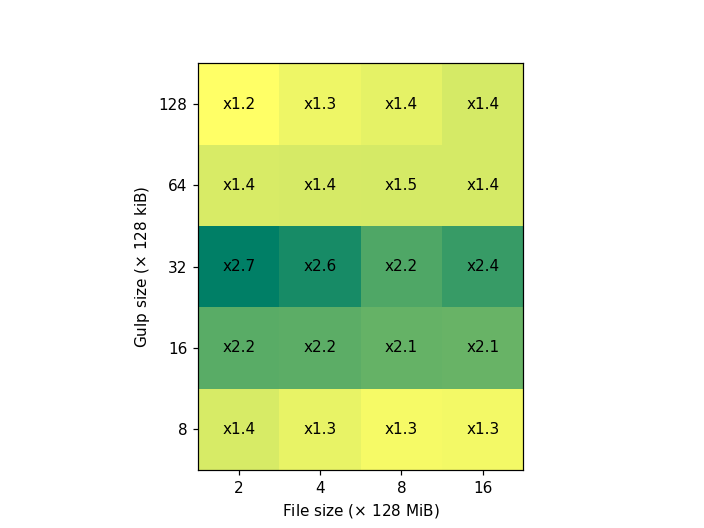

In [10]:
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)
ax1.imshow(two_fft_display_plot, cmap='summer_r', origin='lower')
ax1.set_yticklabels(['', 8, 16, 32, 64, 128, 256])
ax1.set_ylabel(r'Gulp size ($\times$ 128 kiB)')
ax1.set_xticklabels(['', 2, 4, 8, 16])
ax1.set_xlabel(r'File size ($\times$ 128 MiB)')
for (j,i),label in np.ndenumerate(two_fft_display_plot):
    ax1.text(i, j, 'x%.1f'%label, ha='center', va='center')

# Caption ideas

Should emphasize:
- This pipeline was not tuned in any way, it is vanilla Bifrost code, with no explicit core affinities set, and no block fusion enabled. The code is viewable in the benchmarks folder on the Bifrost github.
- Not only do you get more speed for same effort, but you get greater functionality for same effort (bf.map!)
- Easy to switch it to a real-time pipeline for a telescope
- These plots aren't meant to show anything particular about when Bifrost is useful and when it isn't, they are supposed to show the trend of where Bifrost becomes very effective: large gulp sizes and large amounts of data.
- Bottom slower for Bifrost because of the greater Python overhead incurred from small gulp sizes. Small effort tuning gulp sizes eliminates this.
- Both pipelines are GPU-based FFT pipelines, controlled in Python. Similar (say exactly) source lines of code. Through pipeline-parallelism, Bifrost achieves a speedup using the same underlying cuFFT functionality.